In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings(action='ignore')

## READ THE DATA

In [20]:
cr=pd.read_csv("credit_risk.csv")

In [5]:
cr.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [11]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null int64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
cc_age                    1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

## preprocessing the data
## There are no null values so there is no need to replace/drop any columns

## Encoding

## There are many columns with object dtype which need to be encoded for building models

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [22]:
for i in cr.columns:
    if cr[i].dtype in ["int64"]:
        continue
    else:
        cr[i]=le.fit_transform(cr[i])

In [24]:
cr.head() #Notice the encoded values

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,4,3,2,...,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,...,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,3,2,...,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,3,1,...,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,3,2,...,2,53,1,0,2,1,2,0,1,0


## Normalization

In [25]:
for i in cr.columns:
    cr[i]=(cr[i]-cr[i].min())/(cr[i].max()-cr[i].min())

## Feature Engineering

In [28]:
cr.var().sort_values()

current_balance           0.024123
credit_usage              0.031448
foreign_worker            0.035667
existing_credits          0.037076
cc_age                    0.041263
other_payment_plans       0.044428
other_parties             0.049561
housing                   0.070560
credit_history            0.070761
purpose                   0.072366
Average_Credit_Balance    0.077201
job                       0.099536
employment                0.112949
num_dependents            0.131106
residence_since           0.135355
location                  0.139058
property_magnitude        0.162941
over_draft                0.174539
personal_status           0.202771
class                     0.210210
own_telephone             0.241025
dtype: float64

In [29]:
cr.corr(method="spearman")

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
over_draft,1.000000,-0.072512,-0.117856,0.083625,-0.050700,0.083354,-0.025620,0.032948,0.056097,0.107709,...,-0.020469,0.109891,0.053924,-0.012989,0.097292,-0.017719,0.035756,0.032776,-0.019350,0.287776
credit_usage,-0.072512,1.000000,0.013770,0.010462,0.624709,0.030577,0.024880,0.118046,0.095923,0.007809,...,-0.214783,-0.036316,0.006146,-0.125313,0.028430,-0.228087,-0.043265,0.186983,0.171088,-0.205685
credit_history,-0.117856,0.013770,1.000000,-0.013480,0.015222,-0.037489,-0.091285,-0.062267,-0.095431,-0.002265,...,-0.039495,-0.180716,0.031857,0.087932,-0.433477,-0.004314,-0.068853,-0.043856,-0.002455,-0.110050
purpose,0.083625,0.010462,-0.013480,1.000000,0.013101,0.063654,0.074191,0.032455,0.053644,-0.048462,...,-0.015917,0.035123,0.027329,-0.064619,-0.002795,-0.059726,0.023818,0.004178,0.007006,0.138322
current_balance,-0.050700,0.624709,0.015222,0.013101,1.000000,0.062040,0.016033,-0.313100,0.164873,-0.010347,...,-0.182971,0.026298,0.002286,-0.093195,0.023778,-0.298141,0.041815,0.253752,0.081931,-0.087083
Average_Credit_Balance,0.083354,0.030577,-0.037489,0.063654,0.062040,1.000000,0.054797,0.045847,0.033037,0.027144,...,0.051329,0.096957,0.002122,-0.029453,0.033781,-0.035187,0.023307,0.072619,-0.018032,0.098796
employment,-0.025620,0.024880,-0.091285,0.074191,0.016033,0.054797,1.000000,0.084356,0.064473,0.037275,...,-0.022724,0.280598,-0.057286,-0.119700,0.069892,-0.158248,0.032071,0.111769,0.063747,-0.003089
location,0.032948,0.118046,-0.062267,0.032455,-0.313100,0.045847,0.084356,1.000000,0.108319,0.014890,...,-0.018216,0.072157,0.044018,-0.088019,0.020997,-0.077270,-0.072543,0.009144,0.089257,-0.073690
personal_status,0.056097,0.095923,-0.095431,0.053644,0.164873,0.033037,0.064473,0.108319,1.000000,-0.017857,...,0.005611,0.255646,0.004128,-0.259981,0.116231,-0.060002,0.269132,0.082426,-0.042019,0.086449
other_parties,0.107709,0.007809,-0.002265,-0.048462,-0.010347,0.027144,0.037275,0.014890,-0.017857,1.000000,...,-0.137832,0.026611,0.066983,-0.066665,0.012563,-0.042439,-0.003250,0.065355,0.118808,0.004698


In [30]:
import seaborn as sns

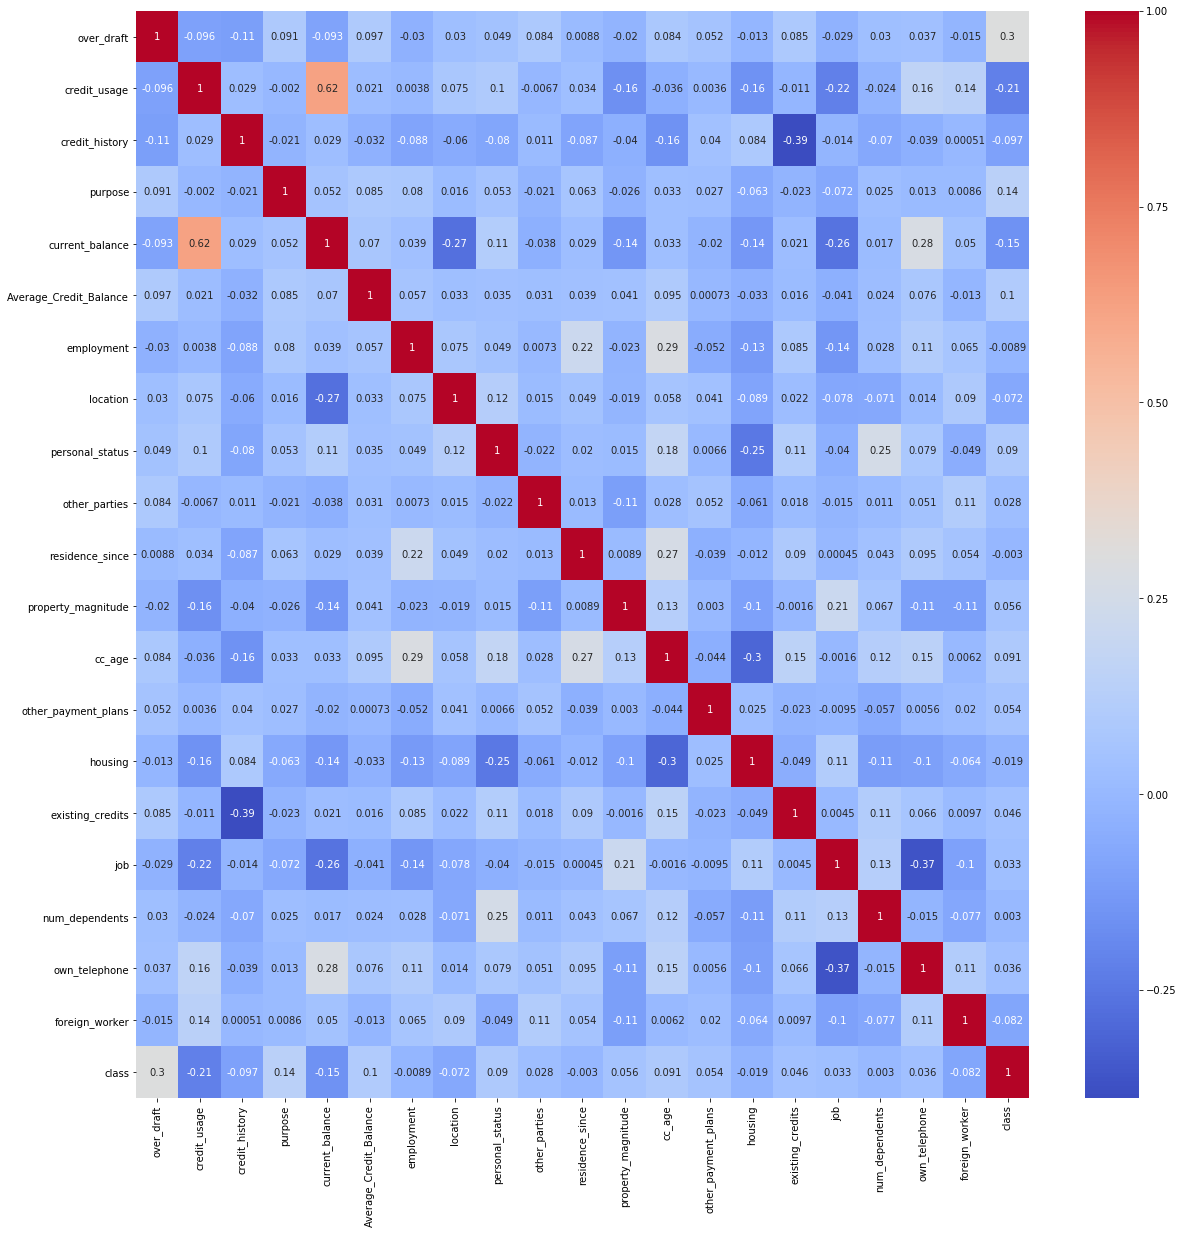

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(cr.corr(),annot=True,cmap='coolwarm')

In [71]:
X=cr.drop('class',1)
y=cr['class']


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=5)
X_train2 = lda.fit_transform(X_train, y_train)
X_test2 = lda.transform(X_test)
variance1=lda.explained_variance_ratio_
variance1

array([1.])

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_train1=pca.fit_transform(X_train)
X_test1=pca.fit_transform(X_test)
variance=pca.explained_variance_ratio_
variance

array([0.14780028, 0.12024545, 0.09367806, 0.09085463, 0.08522655])

In [56]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(min_samples_split=3)
model3 = KNeighborsClassifier()
model4 = SVC(kernel="rbf")

In [57]:
names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for i in [model1,model2,model3,model4]:
    
    i.fit(X_train1,y_train)
    train_accuracy = i.score(X_train1,y_train)
    test_accuracy = i.score(X_test1,y_test)
    print(names[j])
    j+=1
    print(train_accuracy,test_accuracy)

Logistic Regression
0.69625 0.665
Decision Tree
0.985 0.57
KNN
0.805 0.54
SVC
0.695 0.72


In [58]:
names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for i in [model1,model2,model3,model4]:
    
    i.fit(X_train2,y_train)
    train_accuracy = i.score(X_train2,y_train)
    test_accuracy = i.score(X_test2,y_test)
    print(names[j])
    j+=1
    print(train_accuracy,test_accuracy)

Logistic Regression
0.72625 0.72
Decision Tree
0.96625 0.64
KNN
0.78375 0.66
SVC
0.7325 0.725


In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2,min_samples_split=20,min_impurity_decrease=0.05)
model.fit(X_train,y_train)
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print(train_accuracy,test_accuracy)

0.695 0.72


In [74]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=10)
model.fit(X_train,y_train)
train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print(train_accuracy,test_accuracy)

0.745 0.735


In [75]:
feature_imps = pd.DataFrame(np.array([X,model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

ValueError: cannot copy sequence with size 1000 to array axis with dimension 20